In [5]:
#!/usr/bin/python3
#from tkinter import * 
#from tkinter.ttk import *
import tkinter
import tkinter as tk

In [6]:
import MachineLearningProject as MLP
import yfinance as yf
import pandas as pd
from datetime import datetime
import os 
from time import sleep, time
from dateutil.relativedelta import relativedelta
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [7]:
universe = MLP.build_snp(date='2018-1-1',data_path = os.getcwd()+'/data/')

In [8]:
class MY_GUI():
    def createResultWindow(self):
        self.ResultWindow = tk.Toplevel(self.window)
        labelExample = tk.Label(self.ResultWindow, text = "Result Window")
        resultText = tk.Label(self.ResultWindow, text = self.ResultText)
        #buttonExample = tk.Button(newWindow, text = "New Window button")
        self.ResultWindow.title("S&P 500 Investing Strategy Result Window") 
        self.ResultWindow.geometry('1068x681') 
        labelExample.pack()
        resultText.pack()
        #buttonExample.pack()
    
    def __init__(self,window_name):
        self.window = window_name
        # StartDate
        self.StartdateVar = tk.StringVar(self.window, value='2018-01-01')
        
        # Machine
        self.MachineVar = tk.StringVar()
        self.MachineVar.set(('Random Forest','Linear Regression','Neural Network'))
        self.MachinePrint = tk.StringVar(self.window,'Machine')
        self.MachineName = str()
        
        # Features
        self.FeatureVar = tk.StringVar()
        self.FeatureVar.set(('Close','Volume','Momentum','MA5'))
        self.FeaturePrint = tk.StringVar(self.window,'Feature')
        self.FeatureName = str()
        
        # History Depth
        self.HistoryDepthVar = tk.StringVar(self.window, value='12')
        self.TrainDepthVar = tk.StringVar(self.window, value='4')
        self.LongNumberVar = tk.StringVar(self.window, value='15')
        self.ShortNumberVar = tk.StringVar(self.window, value='0')
        self.ResultText = str()
        
    
    # The Main function for calculation    
    def calculate(self):
        print(self.MachineName)
        print(self.FeatureName)
        self.data_path= os.getcwd()+'/data/'
        print(self.data_path)
        
        self.HistoryDepth = int(self.HistoryDepthVar.get())
        self.TrainDepth = int(self.TrainDepthVar.get())
        
        params = {
        'long' : int(self.LongNumberVar.get()), 
        'short' : int(self.ShortNumberVar.get()),
        }
        
        universe = MLP.build_snp(date=self.StartdateVar.get(),
                                 data_path=self.data_path)
        
        port = MLP.build_portfolio(universe, 
                                   hist_depth=self.HistoryDepth, 
                                   train_depth = self.TrainDepth)
        Machine = {
            "Random Forest":RandomForestRegressor(n_estimators=100, random_state=50, n_jobs=-1),
        }
        
        print(self.FeatureName.split(","), #['Close', 'Volume'],#
              Machine.get(self.MachineName), 
              self.HistoryDepth, 
              self.TrainDepth,
              self.StartdateVar.get(), 
        )
        
        
        results, specific_results=MLP.backtest(port, 
                                               self.FeatureName.split(","), 
                                               Machine.get(self.MachineName), 
                                               hist_depth = self.HistoryDepth, 
                                               train_depth= self.TrainDepth,
                                               start_date = self.StartdateVar.get(), 
                                               end_date = '2018-06-01', 
                                               params=params)
        

        print(results,specific_results)
        
        #return results, specific_results
        self.ResultText = str(results,specific_results)
        self.createResultWindow()
        return
        

        
    
    def setMachine(self):
        #print(len(self.window_MachineList.curselection()))
        if self.window_MachineList.curselection():
            value = self.window_MachineList.get(self.window_MachineList.curselection())
            self.MachinePrint.set('Machine Selected: \n' + value)
            self.MachineName = value
        else:
            value = 0
        #self.set_init_window()
        return value
    
    def setFeature(self):
        if self.window_FeatureList.curselection():
            values = [self.window_FeatureList.get(idx) for idx in self.window_FeatureList.curselection()]
            self.FeaturePrint.set('Features: \n'+ str('\n'.join(values)))
            self.FeatureName = str(','.join(values))
        else:
            values = 0
        return values
    
    def HistoryDepthTest(self):
        self.HistoryDepthTestVar = tk.StringVar(self.window, value=str(int(self.HistoryDepthVar.get())+1))
        return 
    
    
    
    # Initialization
    def set_init_window(self):
        self.window.title("S&P 500 Investing Strategy") 
        self.window.geometry('1068x681') 
        # Title
        self.window_Title = tk.Label(self.window,text='S&P 500 Investing Strategy', font = ('Arial',24))
        self.window_Title.pack()
        
        
        # StartdateLabel & StartdateEntry
        self.window_StartdateLabel = tk.Label(self.window,text='Investment Date:', font = ('Arial',18), width = 20)

        
        self.window_StartdateEntry = tk.Entry(self.window, bd = 4, textvariable = self.StartdateVar, font = ('Arial',18), width = 10)
        self.window_StartdateLabel.place(x=60,y=64)
        self.window_StartdateEntry.place(x=260,y=60)

        self.window_StartdateTest = tk.Label(self.window,textvariable =  self.StartdateVar)
        self.window_StartdateTest.place(x=560,y=60)


        # MachineLabel
        self.window_MachineLabel = tk.Label(self.window,text='Machine:', font = ('Arial',18), width = 20)
        self.window_MachineLabel.place(x=60,y=120)

        # MachineList
        self.window_MachineList = tk.Listbox(self.window,
                                             listvariable = self.MachineVar,
                                             height = 3, selectmode = tk.SINGLE)
        self.window_MachineList.place(x=260,y=120)


        # Select Machine
        
        # Push 'OK' Button to select
        self.window_MachineButton = tk.Button(self.window, text = 'OK', command = self.setMachine)
        self.window_MachineButton.place(x=480,y=120)
        
        self.window_MachineNameTest = tk.Label(self.window, textvariable =  self.MachinePrint)
        self.window_MachineNameTest.place(x=560,y=120)

        
        
        # FeatureLabel
        self.window_FeatureLabel = tk.Label(self.window,text='Feature:', font = ('Arial',18), width = 20)
        self.window_FeatureLabel.place(x=60,y=220)

        # FeatureList
        self.window_FeatureList = tk.Listbox(self.window,listvariable = self.FeatureVar,height = 4, selectmode = tk.MULTIPLE)
        self.window_FeatureList.place(x=260,y=220)

        
        # Select Feature
        # Push 'OK' Button to select
        self.window_FeatureButton = tk.Button(self.window, text = 'OK', command = self.setFeature)
        self.window_FeatureButton.place(x=480,y=220)
        self.window_FeatureNameTest = tk.Label(self.window,textvariable = self.FeaturePrint)
        self.window_FeatureNameTest.place(x=560,y=220)
        
        # Select History Depth
        self.window_HistoryDepthLabel = tk.Label(self.window,text='History Depth:', font = ('Arial',18), width = 20)
        self.window_HistoryDepthLabel.place(x=60,y=320)
        self.window_HistoryDepthEntry = tk.Entry(self.window, bd = 4, textvariable = self.HistoryDepthVar, font = ('Arial',18), width = 10)
        self.window_HistoryDepthEntry.place(x=260,y=320)
        
        #tk.StringVar(self.window, value=str(int(self.HistoryDepthVar.get())))
        self.window_HistoryDepthTest = tk.Label(self.window,textvariable = self.HistoryDepthVar)
        self.window_HistoryDepthTest.place(x=560,y=320)
        
        
        # Select Train Depth
        self.window_TrainDepthLabel = tk.Label(self.window,text='Train Depth:', font = ('Arial',18), width = 20)
        self.window_TrainDepthLabel.place(x=60,y=380)
        self.window_TrainDepthEntry = tk.Entry(self.window, bd = 4, textvariable = self.TrainDepthVar, font = ('Arial',18), width = 10)
        self.window_TrainDepthEntry.place(x=260,y=380)
        
        #tk.StringVar(self.window, value=str(int(self.TrainDepthVar.get())))
        self.window_TrainDepthTest = tk.Label(self.window,textvariable = self.TrainDepthVar)
        self.window_TrainDepthTest.place(x=560,y=380)
        
        # Select Long Number
        self.window_LongNumberLabel = tk.Label(self.window,text='Long:', font = ('Arial',18), width = 20)
        self.window_LongNumberLabel.place(x=60,y=380)
        self.window_LongNumberEntry = tk.Entry(self.window, bd = 4, textvariable = self.LongNumberVar, font = ('Arial',18), width = 10)
        self.window_LongNumberEntry.place(x=260,y=380)
        
        
        #tk.StringVar(self.window, value=str(int(self.LongNumberVar.get())))
        self.window_LongNumberTest = tk.Label(self.window,textvariable = self.LongNumberVar)
        self.window_LongNumberTest.place(x=560,y=380)
        
        
        # Select Short Number
        self.window_ShortNumberLabel = tk.Label(self.window,text='Short:', font = ('Arial',18), width = 20)
        self.window_ShortNumberLabel.place(x=60,y=440)
        self.window_ShortNumberEntry = tk.Entry(self.window, bd = 4, textvariable = self.ShortNumberVar, font = ('Arial',18), width = 10)
        self.window_ShortNumberEntry.place(x=260,y=440)
        
        
        #tk.StringVar(self.window, value=str(int(self.ShortNumberVar.get())))
        self.window_ShortNumberTest = tk.Label(self.window,textvariable = self.ShortNumberVar)
        self.window_ShortNumberTest.place(x=560,y=440)
        
        #Calculate
        self.window_CalculateButton = tk.Button(self.window, text = 'Calculate', command = self.calculate)
        self.window_CalculateButton.place(x=260,y=540)
        
        
    

In [9]:
def gui_start():
    window = tk.Tk()  # Realization of the GUI window
    my_window = MY_GUI(window)
    
    my_window.set_init_window()

    window.mainloop()          

Random Forest
Close
/Users/yushao/Desktop/20 Summer/Machine Learning Project/data/
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File is not found.
File 

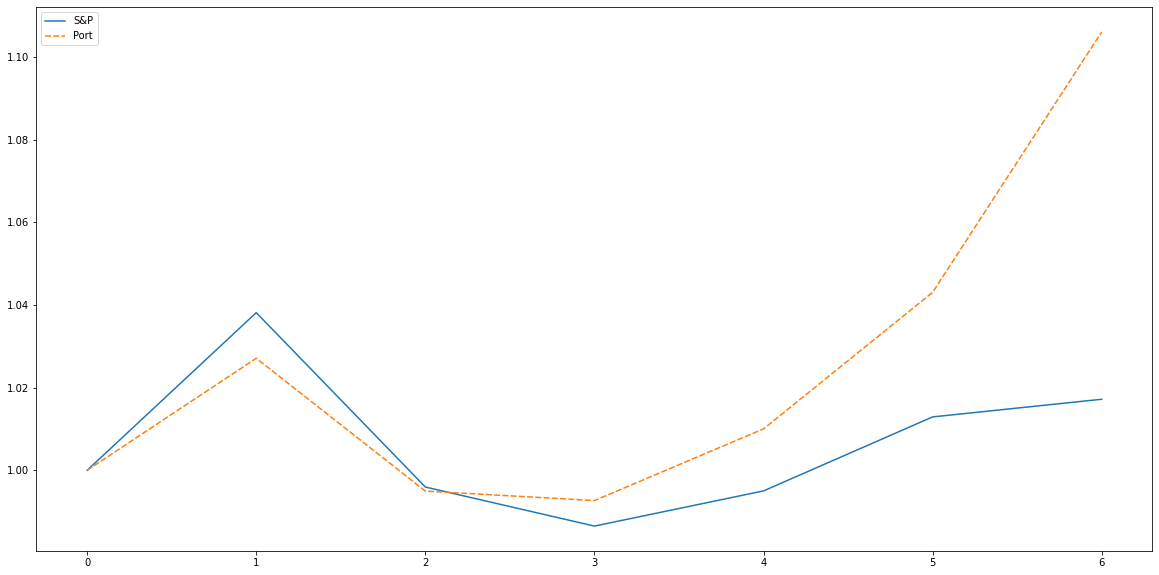


Specifics on the backtest can be found at: /Users/yushao/Desktop/20 Summer/Machine Learning Projectresults/specific_2020-08-13 18:32:38.911718.csv
[0.02709905059664103, -0.031280682685706086, -0.002299461019353559, 0.01746148581971108, 0.0326971229724565, 0.06039229909625205] [{'long': {'TT': 0.0, 'PCG': -0.043076229138475496, 'MAT': 0.02723735408560311, 'K': 0.0011255828911400593, 'MDT': 0.045431145431145445, 'FB': 0.05183475911751451, 'CTL': 0.05681818181818182, 'MU': 0.05247953779489648, 'PPL': 0.025082995204721494, 'CI': 0.020637254901960823, 'VFC': 0.09027461690183589, 'AON': 0.06171988666819819, 'XRAY': -0.07857695282289258, 'PEAK': -0.07648601398601398, 'FLR': 0.17198364008179967}, 'short': {}}, {'long': {'TT': 0.0, 'PSA': -0.008510638297872238, 'VTR': -0.13599668805630305, 'STZ': -0.014533232342359504, 'CHK': -0.19197707736389685, 'JNPR': -0.004977187888842845, 'VNO': -0.0730975686769814, 'AMG': -0.0440293874172185, 'AMGN': 0.0008719916288802306, 'EL': 0.027196969696969723, 'I

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/yushao/anaconda3/lib/python3.6/tkinter/__init__.py", line 1699, in __call__
    return self.func(*args)
  File "<ipython-input-8-8899adf35588>", line 84, in calculate
    self.ResultText = str(results,specific_results)
TypeError: str() argument 2 must be str, not list


In [ ]:
gui_start()

In [13]:
print(os.getcwd()+'/data/')

/Users/yushao/Desktop/20 Summer/Machine Learning Project/data/


In [10]:
"Close,Volume".split(",")

['Close', 'Volume']

In [8]:
tk.Toplevel()

<tkinter.Toplevel object .!toplevel>